In [168]:
!pip install kaggle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [169]:
from google.colab import files
files.upload()  # Upload kaggle.json
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip pima-indians-diabetes-database.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  pima-indians-diabetes-database.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: diabetes.csv            


In [170]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [171]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [173]:
df.shape

(768, 9)

In [174]:
print(df["Glucose"])

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64


In [175]:
# Feature Engineering to Replace Zero's with the mean of each column
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

In [176]:
#Define features and outcomes into x and y, respectively

x = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



Random Forest Prediction Accuracy: 0.7662337662337663


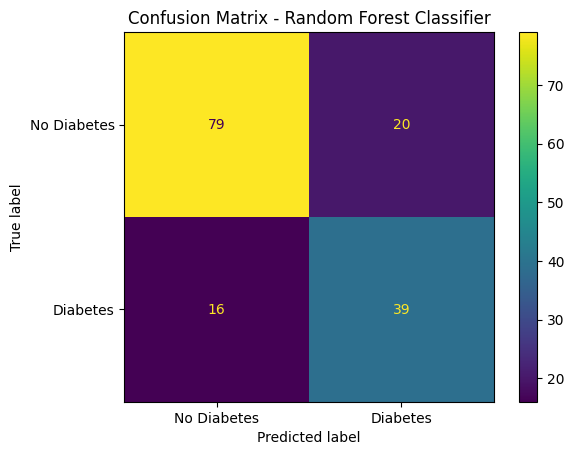

In [177]:

## Random Forest Classifer

# model
randomforest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# training
randomforest_model.fit(x_train, y_train)

# testing
randomforest_predictions = randomforest_model.predict(x_test)

# evaluating
randomforest_accuracy = accuracy_score(y_test, randomforest_predictions)
print(f"Random Forest Prediction Accuracy: {randomforest_accuracy}")

# Confusion Matrix for Random Forest Classifier Model
cm_rf = confusion_matrix(y_test, randomforest_predictions)

cm = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Diabetes', 'Diabetes'])
cm.plot()

plot.title('Confusion Matrix - Random Forest Classifier')

plot.show()

Logistic Regression Accuracy: 0.7662337662337663


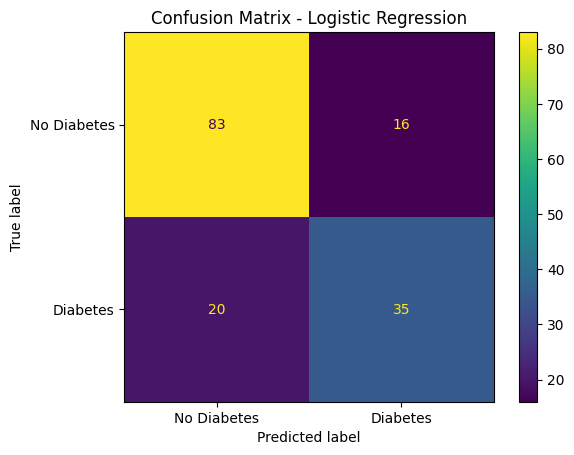

In [178]:

## Logistic Regression

# model
lgr_model = LogisticRegression(random_state=42, max_iter=300)

# training
lgr_model.fit(x_train, y_train)

# testing
lgr_predictions = lgr_model.predict(x_test)

# evaluating
lgr_accuracy = accuracy_score(y_test, lgr_predictions)
print(f"Logistic Regression Accuracy: {lgr_accuracy}")


# Confusion Matrix for Logistic Regression Model
cm_lgr = confusion_matrix(y_test, lgr_predictions)

cm = ConfusionMatrixDisplay(confusion_matrix=cm_lgr, display_labels=['No Diabetes', 'Diabetes'])
cm.plot()

plot.title('Confusion Matrix - Logistic Regression')

plot.show()


# Justification for using Random Forest Classifier and Logistic Regression

## Random Forest Classifier
I decided to choose the Random Forest Classifier model because it is ideal for a dataset like Pima Indian Diabetes that has complex feature interactions. Decision trees and a keen ability to avoid overfitting make Random Forest suitable for diverse datasets such as Pima Indian Diabetes. With these qualities, Random Forest can prioritize which variables influence the prediction of diabetes the most.

## Logistic Regression
I decided to choose Logistic Regression due to its simple nature and ability to provide clear predictions on linear data. When looking at the Pima Indian Diabetes Dataset, its evident that certain ranges in certain features (Glucose, BMI, and Age) have a linear relationship with diabetes prediction.